In [1]:
pwd

'c:\\edu\\03_AI\\deeplearning\\practice'

In [5]:
ls ..

 C 드라이브의 볼륨: Windows-SSD
 볼륨 일련 번호: 5CAF-2C76

 c:\edu\03_AI\deeplearning 디렉터리

2021-02-09  오후 03:32    <DIR>          .
2021-02-09  오후 03:32    <DIR>          ..
2021-02-09  오전 10:27    <DIR>          .idea
2021-02-09  오후 03:32    <DIR>          .ipynb_checkpoints
2021-02-09  오전 10:27    <DIR>          colab
2021-02-09  오전 10:27    <DIR>          dataset
2021-02-09  오후 03:31    <DIR>          deeplearning_class
2021-02-09  오후 03:33    <DIR>          practice
2021-02-09  오후 03:31    <DIR>          run_project
               0개 파일                   0 바이트
               9개 디렉터리  368,095,535,104 바이트 남음


# 데이터 불러오기

In [3]:
import pandas as pd

df = pd.read_csv('./deeplearning/dataset/housing.csv', delim_whitespace=True, header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# 기본 설정

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf

# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 분할

In [8]:
# 원본 데이터
dataset = df.values
X = dataset[:, :-1]
Y = dataset[:, -1]

# 표준화

In [11]:
from sklearn.preprocessing import StandardScaler

dataset = df.values
tmp = dataset[:, :-1]


scaler = StandardScaler()
scaler.fit(tmp)
scaled1 = scaler.transform(tmp)

In [12]:
X = scaled1
Y = dataset[:, -1]

# 정규화

In [17]:
from sklearn.preprocessing import MinMaxScaler

dataset = df.values
tmp = dataset[:, :-1]

scaler = MinMaxScaler()
scaler.fit(tmp)
scaled2 = scaler.transform(tmp)

In [18]:
X = scaled2
Y = dataset[:, -1]

# 데이터 확인

In [19]:
print(dataset.shape)
print(X.shape)
print(Y.shape)

(506, 14)
(506, 13)
(506,)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed)

In [21]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))
print(len(X_train)/(len(X_train)+len(X_test)))  # 비율

354
152
354
152
0.6996047430830039


# early stopping

In [212]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_call_back = EarlyStopping(monitor='val_loss', patience=5)

# 모델링

In [9]:
model = Sequential()
model.add(Dense(30, input_dim = 13, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['acc']) 

In [16]:
model1 = Sequential()
model1.add(Dense(30, input_dim = 13, activation = 'relu'))
model1.add(Dense(6, activation = 'relu'))
model1.add(Dense(1))
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['acc']) 

In [22]:
model2 = Sequential()
model2.add(Dense(30, input_dim = 13, activation = 'relu'))
model2.add(Dense(6, activation = 'relu'))
model2.add(Dense(1))
model2.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['acc']) 

# 모델 학습

In [23]:
# verbose=0 학습 진행 경과 출력하지 않음
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, batch_size = 10) # callbacks=[early_stopping_call_back]

Epoch 1/100
29/29 [==============================] - 1s 21ms/step - loss: 634.5494 - acc: 0.0000e+00 - val_loss: 566.0595 - val_acc: 0.0000e+00
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 602.1244 - acc: 0.0000e+00 - val_loss: 546.3507 - val_acc: 0.0000e+00
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 586.5552 - acc: 0.0000e+00 - val_loss: 519.5414 - val_acc: 0.0000e+00
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 531.4351 - acc: 0.0000e+00 - val_loss: 480.2762 - val_acc: 0.0000e+00
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 491.8930 - acc: 0.0000e+00 - val_loss: 426.0000 - val_acc: 0.0000e+00
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 427.7913 - acc: 0.0000e+00 - val_loss: 358.8429 - val_acc: 0.0000e+00
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 324.7463 - acc: 0.0000e+00 - val_loss: 284.9374 - val_acc: 0.0000e+0

29/29 [==============================] - 0s 2ms/step - loss: 22.5895 - acc: 0.0000e+00 - val_loss: 19.7446 - val_acc: 0.0000e+00
Epoch 59/100
29/29 [==============================] - 0s 2ms/step - loss: 24.9146 - acc: 0.0000e+00 - val_loss: 19.3381 - val_acc: 0.0000e+00
Epoch 60/100
29/29 [==============================] - 0s 2ms/step - loss: 39.8673 - acc: 0.0000e+00 - val_loss: 19.1878 - val_acc: 0.0000e+00
Epoch 61/100
29/29 [==============================] - 0s 2ms/step - loss: 30.9200 - acc: 0.0000e+00 - val_loss: 19.1179 - val_acc: 0.0000e+00
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 28.9796 - acc: 0.0000e+00 - val_loss: 18.7361 - val_acc: 0.0000e+00
Epoch 63/100
29/29 [==============================] - 0s 2ms/step - loss: 29.1977 - acc: 0.0000e+00 - val_loss: 18.7644 - val_acc: 0.0000e+00
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 26.1939 - acc: 0.0000e+00 - val_loss: 18.2934 - val_acc: 0.0000e+00
Epoch 65/100
29/29 

In [24]:
# verbose=0 학습 진행 경과 출력하지 않음
history1 = model1.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, batch_size = 10) # callbacks=[early_stopping_call_back]

Epoch 1/100
29/29 [==============================] - 0s 6ms/step - loss: 605.2456 - acc: 0.0000e+00 - val_loss: 523.6251 - val_acc: 0.0000e+00
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 550.7290 - acc: 0.0000e+00 - val_loss: 473.3992 - val_acc: 0.0000e+00
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 499.0830 - acc: 0.0000e+00 - val_loss: 397.1936 - val_acc: 0.0000e+00
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 391.3107 - acc: 0.0000e+00 - val_loss: 303.2412 - val_acc: 0.0000e+00
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 294.3282 - acc: 0.0000e+00 - val_loss: 206.5853 - val_acc: 0.0000e+00
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 199.5625 - acc: 0.0000e+00 - val_loss: 144.3274 - val_acc: 0.0000e+00
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 116.8538 - acc: 0.0000e+00 - val_loss: 119.0973 - val_acc: 0.0000e+00

29/29 [==============================] - 0s 2ms/step - loss: 15.8666 - acc: 0.0000e+00 - val_loss: 14.6600 - val_acc: 0.0000e+00
Epoch 59/100
29/29 [==============================] - 0s 2ms/step - loss: 18.4241 - acc: 0.0000e+00 - val_loss: 14.4821 - val_acc: 0.0000e+00
Epoch 60/100
29/29 [==============================] - 0s 2ms/step - loss: 30.1460 - acc: 0.0000e+00 - val_loss: 14.7335 - val_acc: 0.0000e+00
Epoch 61/100
29/29 [==============================] - 0s 2ms/step - loss: 24.0064 - acc: 0.0000e+00 - val_loss: 14.8159 - val_acc: 0.0000e+00
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 22.6527 - acc: 0.0000e+00 - val_loss: 14.3868 - val_acc: 0.0000e+00
Epoch 63/100
29/29 [==============================] - 0s 2ms/step - loss: 23.8164 - acc: 0.0000e+00 - val_loss: 14.2660 - val_acc: 0.0000e+00
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 20.0580 - acc: 0.0000e+00 - val_loss: 14.1368 - val_acc: 0.0000e+00
Epoch 65/100
29/29 

In [25]:
# verbose=0 학습 진행 경과 출력하지 않음
history2 = model2.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, batch_size = 10) # callbacks=[early_stopping_call_back]

Epoch 1/100
29/29 [==============================] - 0s 5ms/step - loss: 630.0630 - acc: 0.0000e+00 - val_loss: 564.1333 - val_acc: 0.0000e+00
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 599.6893 - acc: 0.0000e+00 - val_loss: 542.1491 - val_acc: 0.0000e+00
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 579.4567 - acc: 0.0000e+00 - val_loss: 497.7208 - val_acc: 0.0000e+00
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 499.3227 - acc: 0.0000e+00 - val_loss: 415.9024 - val_acc: 0.0000e+00
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 410.7075 - acc: 0.0000e+00 - val_loss: 304.2513 - val_acc: 0.0000e+00
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 288.5968 - acc: 0.0000e+00 - val_loss: 199.6969 - val_acc: 0.0000e+00
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 160.2984 - acc: 0.0000e+00 - val_loss: 142.3822 - val_acc: 0.0000e+00

29/29 [==============================] - 0s 2ms/step - loss: 20.6994 - acc: 0.0000e+00 - val_loss: 17.8793 - val_acc: 0.0000e+00
Epoch 59/100
29/29 [==============================] - 0s 2ms/step - loss: 22.8665 - acc: 0.0000e+00 - val_loss: 17.6431 - val_acc: 0.0000e+00
Epoch 60/100
29/29 [==============================] - 0s 2ms/step - loss: 36.1472 - acc: 0.0000e+00 - val_loss: 17.6982 - val_acc: 0.0000e+00
Epoch 61/100
29/29 [==============================] - 0s 2ms/step - loss: 29.0393 - acc: 0.0000e+00 - val_loss: 17.7046 - val_acc: 0.0000e+00
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 27.5019 - acc: 0.0000e+00 - val_loss: 17.4685 - val_acc: 0.0000e+00
Epoch 63/100
29/29 [==============================] - 0s 2ms/step - loss: 27.5138 - acc: 0.0000e+00 - val_loss: 17.5333 - val_acc: 0.0000e+00
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 25.0210 - acc: 0.0000e+00 - val_loss: 17.2240 - val_acc: 0.0000e+00
Epoch 65/100
29/29 

In [26]:
print(type(history))
print(type(history1))
print(type(history2))

<class 'tensorflow.python.keras.callbacks.History'>
<class 'tensorflow.python.keras.callbacks.History'>
<class 'tensorflow.python.keras.callbacks.History'>


In [27]:
vloss = history.history['val_loss']
loss = history.history['loss']
vacc = history.history['val_acc']
acc = history.history['acc']

In [28]:
std_vloss = history1.history['val_loss']
std_loss = history1.history['loss']
std_vacc = history1.history['val_acc']
std_acc = history1.history['acc']

In [29]:
norm_vloss = history2.history['val_loss']
norm_loss = history2.history['loss']
norm_vacc = history2.history['val_acc']
norm_acc = history2.history['acc']

In [30]:
print(len(vloss))
print(len(loss))
print(len(acc))
print(len(vacc))

100
100
100
100


In [152]:
%matplotlib qt

In [31]:
%matplotlib inline

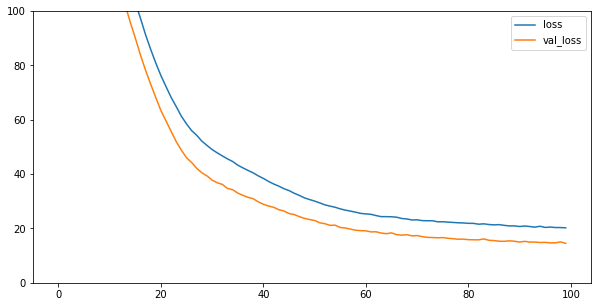

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.ylim(0, 100)
plt.plot(range(len(loss)), loss, label='loss')
plt.plot(range(len(loss)), vloss, label='val_loss')
plt.legend()
plt.show()

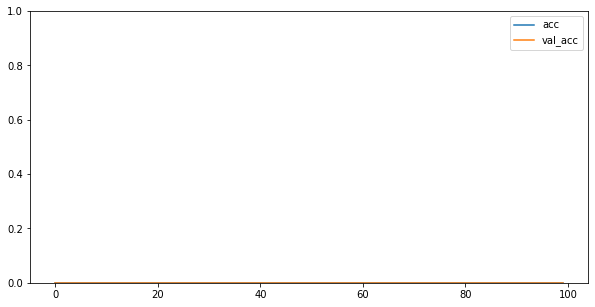

In [33]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 1)
plt.plot(range(len(loss)), acc, label='acc')
plt.plot(range(len(loss)), vacc, label='val_acc')
plt.legend()
plt.show()

# 일반, 표준화, 정규화 loss 그래프

In [34]:
print(len(loss))
print(len(std_loss))
print(len(norm_loss))

100
100
100


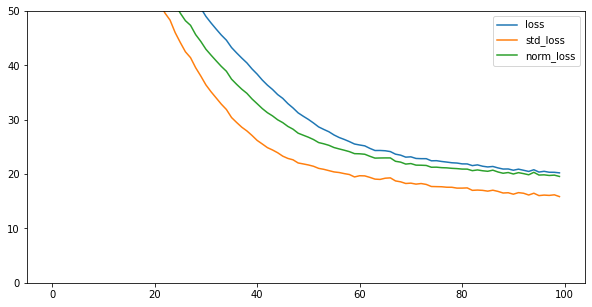

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.ylim(0, 50)
plt.plot(range(len(loss)), loss, label='loss')
plt.plot(range(len(loss)), std_loss, label='std_loss')
plt.plot(range(len(loss)), norm_loss, label='norm_loss')
plt.legend()

plt.savefig('c:/edu/py_data/loss_graph.jpg')
plt.show()

# 테스트

In [36]:
Y_prediction = model1.predict(X_test).flatten()

In [37]:
model1.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 737us/step - loss: 24.9418 - acc: 0.0000e+00


[24.941781997680664, 0.0]

In [38]:
model1.evaluate(X_test, Y_test)[1]

5/5 [==============================] - 0s 753us/step - loss: 24.9418 - acc: 0.0000e+00


0.0

In [39]:
for i in range(len(Y_test)):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print(f'{i+1:3d}번째 데이터 >>> 실제가격: {label:5.2f}, 예상가격: {prediction:5.2f}, 오차: {label-prediction:5.2f}')

  1번째 데이터 >>> 실제가격: 22.60, 예상가격: 23.59, 오차: -0.99
  2번째 데이터 >>> 실제가격: 50.00, 예상가격: 22.55, 오차: 27.45
  3번째 데이터 >>> 실제가격: 23.00, 예상가격: 26.60, 오차: -3.60
  4번째 데이터 >>> 실제가격:  8.30, 예상가격: 12.75, 오차: -4.45
  5번째 데이터 >>> 실제가격: 21.20, 예상가격: 19.57, 오차:  1.63
  6번째 데이터 >>> 실제가격: 19.90, 예상가격: 19.64, 오차:  0.26
  7번째 데이터 >>> 실제가격: 20.60, 예상가격: 20.05, 오차:  0.55
  8번째 데이터 >>> 실제가격: 18.70, 예상가격: 20.88, 오차: -2.18
  9번째 데이터 >>> 실제가격: 16.10, 예상가격: 15.44, 오차:  0.66
 10번째 데이터 >>> 실제가격: 18.60, 예상가격: 15.06, 오차:  3.54
 11번째 데이터 >>> 실제가격:  8.80, 예상가격:  5.17, 오차:  3.63
 12번째 데이터 >>> 실제가격: 17.20, 예상가격: 12.67, 오차:  4.53
 13번째 데이터 >>> 실제가격: 14.90, 예상가격: 16.34, 오차: -1.44
 14번째 데이터 >>> 실제가격: 10.50, 예상가격:  9.45, 오차:  1.05
 15번째 데이터 >>> 실제가격: 50.00, 예상가격: 42.73, 오차:  7.27
 16번째 데이터 >>> 실제가격: 29.00, 예상가격: 31.82, 오차: -2.82
 17번째 데이터 >>> 실제가격: 23.00, 예상가격: 21.63, 오차:  1.37
 18번째 데이터 >>> 실제가격: 33.30, 예상가격: 37.43, 오차: -4.13
 19번째 데이터 >>> 실제가격: 29.40, 예상가격: 31.26, 오차: -1.86
 20번째 데이터 >>> 실제가격: 21.00, 예상가격: 21.22, 오차: -0.22
